In [2]:
import logic as lc
#Setting up the environement
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Dummy pandas dataframe
#Setting up time in minutes
start = 0
end = 480
def minute_range(start, end, step=15):
    cur = start
    time_list = [cur]
    while cur < end:
        cur = cur+step
        time_list.append(cur)
    return time_list
        

#numoy array
max = 50
time_list = minute_range(start,end,15)
x = np.linspace(0,m.pi*50,len(time_list))
y = np.array([m.sin(i/50)*max for i in x])
time = time_list

df = pd.DataFrame({'time':time_list})

def eight_row_sin(lst, df, max_, min_, sd,x):
    max_ = np.random.uniform(min_,max_, 1)
    def change_to_zero(x):
        if x<0:
            return 0
        else:
            return x
    
    
    for i in lst:
        df[i]  = np.array([m.sin(i/50)*max_ for i in x])
        df[i] = df[i].apply(lambda x: int(np.random.uniform(x - sd, x + sd, 1)))
        df[i] = df[i].apply(change_to_zero)
    return df


Day_Leg = ['North_a','South_a','West_a','East_a']
df = eight_row_sin(lst=Day_Leg, df=df, max_=200, min_=150, sd = 30, x=x)



# for i in Day_Leg:
#     fig,ax = plt.subplots()
#     print(i)
#     ax.scatter(df.x,df[i])
#     ax.set(xlabel = 'Time (Minutes)', ylabel = 'Demand')
#     plt.show()


In [3]:
df

,time,North_a,South_a,West_a,East_a
0,0,0,0,29,9
1,15,23,28,0,0
2,30,7,18,45,49
3,45,20,25,58,30
4,60,69,32,55,34
5,75,97,97,58,61
6,90,58,68,71,86
7,105,117,110,115,118
8,120,139,84,111,108
9,135,103,148,132,96


In [5]:
df = pd.read_excel('Data\Intersection Data\Corrales - JR Borja\Vehicle Type Data\Car_SUV.xlsx', sheet_name='Cars_SUV')
df

FileNotFoundError: [Errno 2] No such file or directory: 'Data\\Intersection Data\\Corrales - JR Borja\\Vehicle Type Data\\Car_SUV.xlsx'

In [11]:
egress = pd.read_excel('Data\Intersection Data\Corrales - JR Borja\Vehicle Type Data\Car_SUV.xlsx', sheet_name='Cars_SUV_Egress', index_col=0).fillna(0)
egress

,North_f,South_f,West_f,East_f
Route,,,,
North_a,0.0,3185.0,1618.0,0.0
South_a,3524.0,0.0,0.0,156.0
West_a,0.0,45.0,0.0,835.0
East_a,193.0,0.0,1124.0,0.0


In [8]:
from pathlib import Path
import json

time_index_all_routes = lc.load_time_index(df)
possible_route = {
    "North_a":{
        "South_f": 40,
        "West_f": 60},
    "South_a":{
        "North_f": 75, 
        "East_f": 25},
    "East_a":{
        "West_f": 70,
        "North_f": 30},
    "West_a":{
        "East_f": 55,
        "South_f": 45}
    }
with open('possible_route.json','w') as f:
    file = json.dumps(possible_route)
    f.write(file)

reference_dict = {
    "North_a" : "785902529",
    "North_f" : "-785902529",
    "West_a" : "785902540#0",
    "West_f" : "-785902540#1",
    "South_a" : "-732022517",
    "South_f" : "732022517",
    "East_a" : "-785902540#2",
    "East_f" : "785902540#2"}

with open('reference_dict.json','w') as f:
    file = json.dumps(reference_dict)
    f.write(file)


In [1]:
import logic as lc

def flow_generator()

NameError: name 'df' is not defined

In [4]:
PATH = "Simulation_Environment/Main Route Simulation/osm.passenger.trips.xml"
def generate(route_weight,reference_dict, df, time_index):
    """ 
    Generates the trips in xml of the route
    """ 
    #generates the tag of each vehicle in xml format
    vehicle_xml_tag_array = []
    count = 0
    for lane_approach in route_weight:
        lane_approach_dict = route_weight[lane_approach]

        for index,value in enumerate(time_index[lane_approach]):

            tag = '<trip id="veh{}" type="veh_passenger" depart="{}" departLane="best" from="{}" to="{}"/>\n'.format(count,value,reference_dict[lane_approach],reference_dict[lc.to_route(lane_approach, possible_route=route_weight)])
            vehicle_xml_tag_array.append((tag, value))
            count +=1
    vehicle_xml_tag_array = sorted(vehicle_xml_tag_array,key = lambda x: x[1])  #order keys using the seconds tuple which is the duration(keys, duration)
    vehicle_xml_tag_array = [value for value, _ in vehicle_xml_tag_array]

    #writes the schema and vehicle type of the network as ...trips.xml
    with open(PATH, "w") as file:
        print(r'''<?xml version="1.0" encoding="UTF-8"?>

<routes xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="http://sumo.dlr.de/xsd/routes_file.xsd">
<vType id="veh_passenger" vClass="passenger"/>



''', file=file)
    
    #appends the tags to ...trips.xml 
    with open(PATH, "a") as file:
        for tag in vehicle_xml_tag_array:
            file.write(tag)
        file.write("</routes>")

all_vehicles = generate(possible_route,reference_dict,df,time_index_all_routes)

141 ms ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [2]:
import matplotlib.pyplot as plt 

df = pd.read_csv('data.csv')
df=df.drop(columns=['count'])
df

,bin,E_0,E_1,N_0,N_1,S_0,S_1,W_0,W_1
0,"(0, 900]",0.023333,0.000000,0.188889,0.000000,0.000000,0.000000,0.308889,0.001111
1,"(900, 1800]",0.553333,0.094444,0.310000,0.000000,0.326667,0.003333,0.545556,0.026667
2,"(1800, 2700]",0.294444,0.022222,0.658889,0.060000,0.173333,0.000000,0.230000,0.000000
3,"(2700, 3600]",0.647778,0.270000,0.782222,0.103333,0.354444,0.026667,0.686667,0.144444
4,"(3600, 4500]",0.552222,0.065556,0.622222,0.073333,0.654444,0.236667,0.831111,0.230000
5,"(4500, 5400]",0.611111,0.071111,0.847778,0.117778,0.665556,0.196667,0.895556,0.242222
6,"(5400, 6300]",0.612222,0.345556,1.034444,0.267778,0.854444,0.448889,0.764444,0.202222
7,"(6300, 7200]",0.934444,0.593333,0.891111,0.140000,1.016667,0.663333,1.031111,0.540000
8,"(7200, 8100]",0.921111,0.633333,1.585556,0.494444,1.148889,0.623333,0.883333,0.395556
9,"(8100, 9000]",0.853333,0.850000,1.483333,0.507778,1.227778,0.690000,1.002222,0.765556


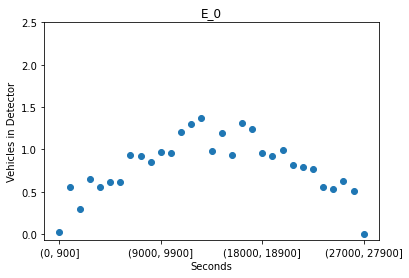

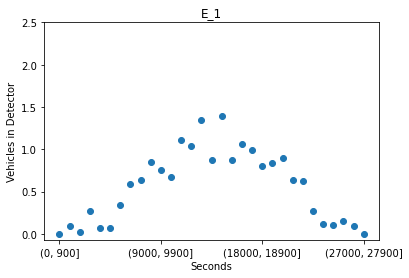

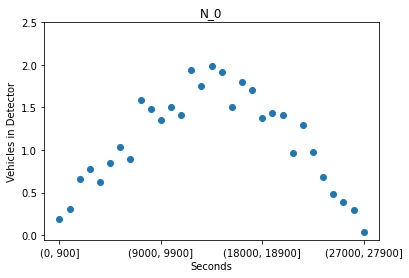

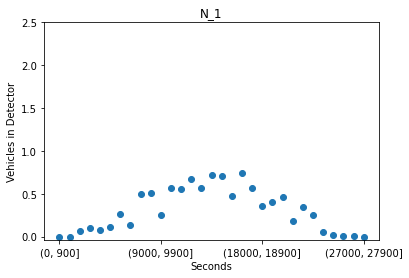

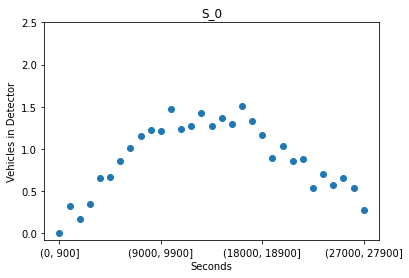

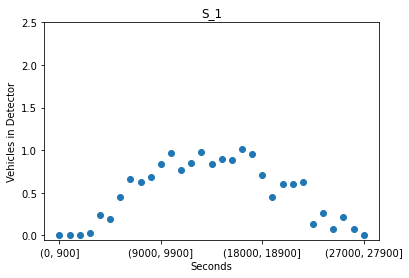

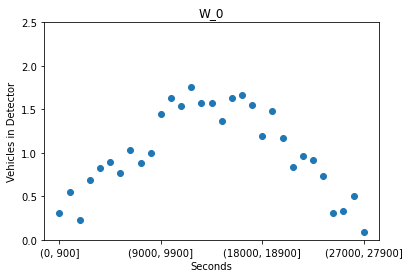

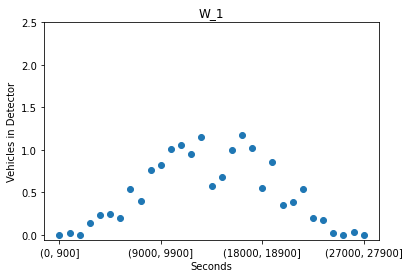

In [7]:
for i in range(1, df.shape[1]):
    fig,ax = plt.subplots()
    ax.scatter(df.iloc[:,0],df.iloc[:,i])
    ax.set_xlabel("Seconds")
    ax.set_ylabel("Vehicles in Detector")
    ax.set_title(df.columns.values[i])
    ax.set_yticks(np.arange(0,3,0.5))
    ax.set_xticks([val for index, val in enumerate(df['bin']) if index % 10 == 0])

In [6]:
import json

phase_program={
    "4889475255":
    {0:[40,"srrrrGGGggsrrrrGGGgg"],
    1:[6,"srrrryyyyysrrrryyyyy"],
    2:[40,"GGGggsrrrrGGGggsrrrr"],
    3:[6,"yyyyysrrrryyyyysrrrr"]}
}
with open("phase_program.json","w") as f:
    f.write(json.dumps(phase_program))


'{"A": [1, 2, 3], "B": "Lmao", "C": true}'